In [147]:
import pandas as pd
import numpy as np 
from scipy import stats
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

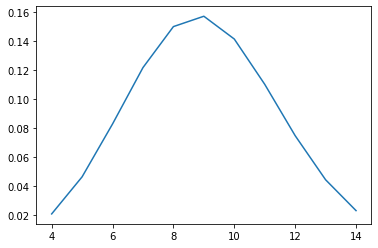

In [167]:
n, p = 30, 0.3
data = np.arange(
    stats.binom.ppf(0.01, n, p), 
    stats.binom.ppf(0.99, n, p), 
)
    
plt.plot(data, stats.binom.pmf(data, n, p) ) 

In [178]:
nsamples = 10000
markov = np.zeros(nsamples - burn)
position = 0.01
step = .01
mu_prior = 0.5
sigma_prior = .2
burn = 5000

def likelihood(position, d = data, n = n) : 
    return np.product(stats.binom.pmf(data, n, position)) 

def prior(val) : 
    return stats.norm.pdf(val, loc = mu_prior, scale = sigma_prior)

for i in range(0, len(markov) + burn) : 
    proposed = random.choice((-1, 1))
    proposed = position + proposed * step
    
    if likelihood(proposed) * prior(proposed) > likelihood(data, n, position) * prior(position) : 
        position = proposed #if likelihood is bigger in next step, dip
        
    else : # give either stay (0) or move (1) based on L() 
        odds = [likelihood(proposed) * prior(proposed),
               likelihood(position) * prior(position) - likelihood(proposed) * prior(proposed)
               ]
        #stay or leave, proportional to the posterior prob btwn leaving and staying

        position = position + ((proposed - position) * 
                               (random.choices([1, 0], weights = odds, k = 1))[0])
        
    if i < burn : 
        continue
    else : 
        markov[i - burn] = position

Text(0.5, 1.0, 'trace')

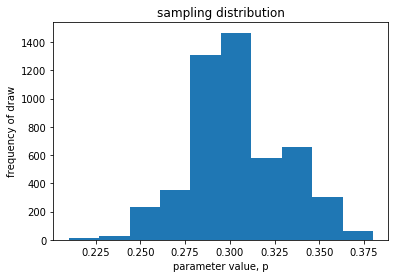

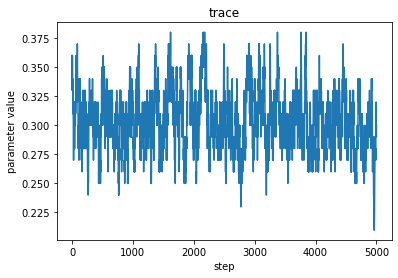

In [179]:
plt.hist(markov)
plt.xlabel('parameter value, p')
plt.ylabel('frequency of draw')
plt.title('sampling distribution')

plt.figure()
plt.plot(np.linspace(0, len(markov), len(markov)), markov) 
plt.xlabel('step')
plt.ylabel('parameter value')
plt.title('trace')

#### interestingly, if i set the start too far away, the chain can never hit an area of high probability, 
#### this could be fixed with a bigger step size during burn in / 'tuning'